In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Replace with your actual file path
file_path = "data/mapped.bed/mapped.bed"

data = []
with open(file_path, 'r') as f:
    for line in f:
        cols = line.strip().split()
        if len(cols) < 11:
            continue
        # Extract centers
        c1_start, c1_end = int(cols[2]), int(cols[3])
        c2_start, c2_end = int(cols[8]), int(cols[9])

        C1 = (c1_start + c1_end) // 2
        C2 = (c2_start + c2_end) // 2
        X = C2 - C1
        Y = c2_end - c2_start

        data.append((X, Y))


In [5]:
# Count Z: frequency of Y at X
xy_counter = defaultdict(int)
for x, y in data:
    xy_counter[(x, y)] += 1

# Convert to DataFrame
df = pd.DataFrame([(x, y, z) for (x, y), z in xy_counter.items()], columns=["X", "Y", "Z"])

# Pivot to 2D matrix for heatmap
heatmap_data = df.pivot_table(index='Y', columns='X', values='Z', fill_value=0)

# Sort axes for better view
heatmap_data = heatmap_data.sort_index(ascending=False)  # Y descending
heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)  # X ascending


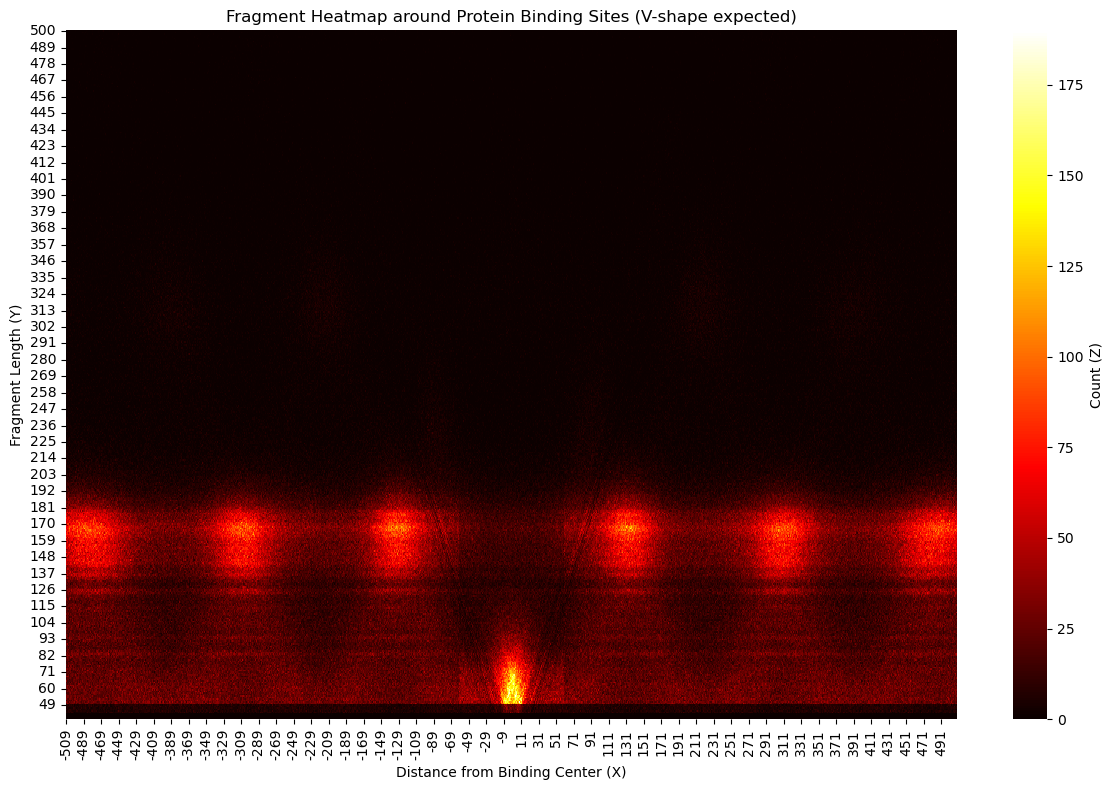

In [6]:
# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='hot', cbar_kws={'label': 'Count (Z)'})
plt.title("Fragment Heatmap around Protein Binding Sites (V-shape expected)")
plt.xlabel("Distance from Binding Center (X)")
plt.ylabel("Fragment Length (Y)")
plt.tight_layout()
plt.show()
